(pandas-categories-notebook)=
# Dati categoriali con Pandas

I dati di tipo `category` sono un tipo di dati Pandas corrispondente alle variabili categoriali statistiche. Una variabile di tipo `category` assume un numero limitato, e solitamente fisso, di possibili valori (dette `categories`). Esempi sono il genere, la classe sociale, il paese di appartenenza, o la valutazione tramite scale Likert. Contrariamente alle variabili categoriali statistiche, i dati categoriali Pandas possono avere un ordine (ad es. 'assolutamente d'accordo' vs 'd'accordo'). Le operazioni numeriche (addizioni, divisioni, …) non sono possibili. Una descrizione approfondita della manipolazione di dati categoriali con Pandas si può trovare seguendo questo [link](https://pandas.pydata.org/docs/user_guide/categorical.html). Esamineremo qui solo alcuni principi di base.


In [89]:
import pandas as pd
import numpy as np
import seaborn as sns


Per fare un esempio, consideriamo nuovamente i dati `penguins.csv`. Come in precedenza, dopo avere caricato i dati, rimuoviamo i dati mancanti.

In [90]:
df = pd.read_csv("data/penguins.csv")
df.dropna(inplace=True)


Si noti che le varibili non numeriche, di default, non sono del tipo `category`. Nel caso presente sono di tipo `object`: 

In [91]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

Possiamo trasformare le variabili `object` in variabili di tipo `category` usando la funzione `astype("category")`

In [92]:
df["species"] = df["species"].astype("category")
df["island"] = df["island"].astype("category")
df["sex"] = df["sex"].astype("category")


In [93]:
df.dtypes

species              category
island               category
bill_length_mm        float64
bill_depth_mm         float64
flipper_length_mm     float64
body_mass_g           float64
sex                  category
year                    int64
dtype: object

Possiamo usare `unique()` per ottenere l'elenco delle classi:

In [94]:
df["island"].unique()

['Torgersen', 'Biscoe', 'Dream']
Categories (3, object): ['Biscoe', 'Dream', 'Torgersen']

È possibile usare `value_counts()` per ottenere una distribuzione di frequenza assoluta.  L'argomento `normalize` posto a `True` fornisce le frequenze relative.

In [95]:
df["island"].value_counts()

Biscoe       163
Dream        123
Torgersen     47
Name: island, dtype: int64

Spesso vogliamo cambiare l'ordine delle categorie, specialmente quando creiamo dei grafici. Ad esempio, consideriamo un violin plot per la variabile `bill_length_mm` in funzione dell'isola. Per fare questo usiamo la funzione `violinplot` di `seaborn` (si veda il capitolo {ref}`intro-seaborn-notebook`).

<AxesSubplot: xlabel='island', ylabel='bill_length_mm'>

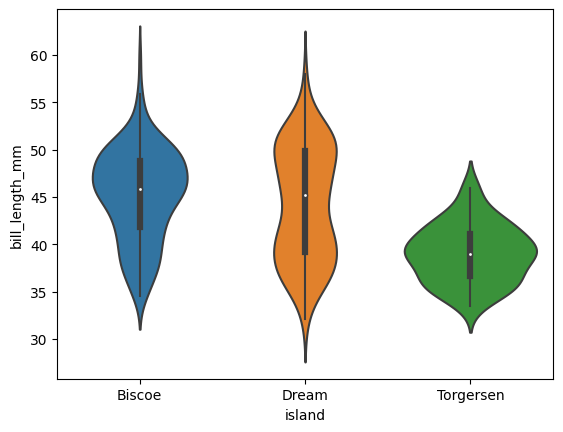

In [96]:
sns.violinplot(x="island", y="bill_length_mm", data=df)


Supponiamo di volere riordinare i nomi delle isole nel modo seguente: Dream, Torgersen, Biscoe. Questo risultato può essere ottenuto usando la funzione `cat.reorder_categories()` che prende in input una lista con i nomi delle categorie della variabile considerata, elencati nell'ordine desiderato. Si noti che non possiamo eseguire questa operazione `inplace` ma dobbiamo creare una nuova variabile.

In [97]:
df["island_new"] = df["island"].cat.reorder_categories(["Dream", "Torgersen", "Biscoe"])


<AxesSubplot: xlabel='island_new', ylabel='bill_length_mm'>

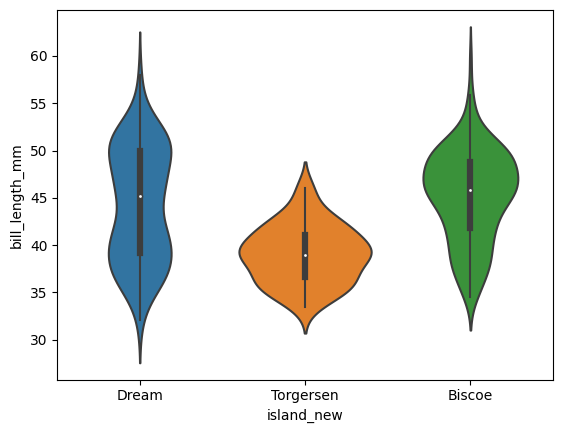

In [98]:
sns.violinplot(x="island_new", y="bill_length_mm", data=df)


È anche possibile volere cambiare le categorie esistenti. Per esempio, potremmo volere confrontare i dati dell'isola Torgersen con quelli delle altre due isole. A questo fine usiamo `map()` a cui passiamo un dizionario che specifica le nuove categorie. Un esempio è il seguente.

In [99]:
island_mapping = {"Dream": "Other", "Torgersen": "Torgersen", "Biscoe": "Other"}
df = df.assign(island_new=df["island_new"].map(island_mapping))
df["island_new"].value_counts()


Other        286
Torgersen     47
Name: island_new, dtype: int64

<AxesSubplot: xlabel='island_new', ylabel='bill_length_mm'>

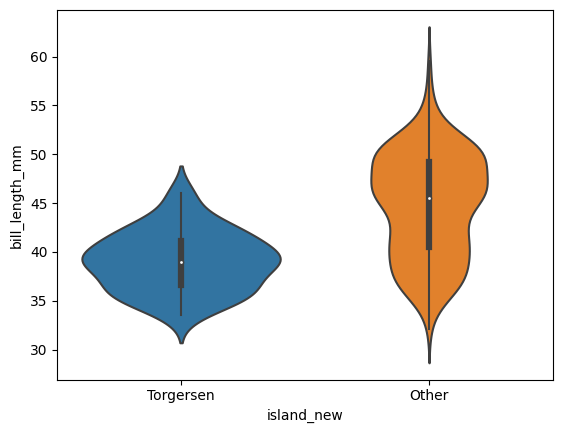

In [100]:
sns.violinplot(x="island_new", y="bill_length_mm", data=df)


## Watermark

In [ ]:
%load_ext watermark
%watermark -n -u -v -iv -w